## Univariate feature selection


## ## SelectKBest K=11
## Accuracy is:  0.88
## ‘Age', 'FBS', 'ALB', 'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH

## SelectKBest

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import warnings

In [2]:


from sklearn.feature_selection import SelectKBest, chi2

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix


Feature - Cat, Target - Cat ==> Chi-Square

Feature - Numeric, Target - Numeric ==> Correlation

Feature - Cat, Target - Numeric ==> f_regression

Feature - Numeric, Target - Cat ==> f_classification


In [3]:
BC = pd.read_csv('bc_with_mis_90.csv')

BC.shape

(2437, 23)

In [4]:
## دتاة لأيجاد الدقة

In [5]:
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    
    print ("\n")
    
    ### CLASSIFACTION Report
    
    
    print('classification_report Decision Tree')
    print('.......................................') 

    print(classification_report(y,model.predict(x))) 
    print("accuracy_score=",accuracy_score(y,model.predict(x))) 

    
    #print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                       #pd.Series(y['CLASS'],name='Actual')))
    return 1

In [6]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 23 columns):
Sex          2437 non-null int64
Age          2437 non-null int64
Adress       2437 non-null object
FBS          2048 non-null float64
Urea         2275 non-null float64
Creatinin    2282 non-null float64
ALB          2148 non-null float64
TCa          2142 non-null float64
GPT          2140 non-null float64
GOT          2202 non-null float64
ALP          2126 non-null float64
CA15         2435 non-null float64
CEA          2435 non-null float64
WBC          2333 non-null float64
RBC          2369 non-null float64
HGB          2337 non-null float64
PLT          2258 non-null float64
ESR          2049 non-null float64
LDH          2052 non-null float64
Na           2011 non-null float64
K            2039 non-null float64
CL           1775 non-null float64
CLASS        2437 non-null int64
dtypes: float64(19), int64(3), object(1)
memory usage: 438.0+ KB


In [7]:
BC.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.4,1.0,2.0,1.0,124.0,69.12,8.02,3.4,4.60,13.4,500.0,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,NaN,9.6,3.0,7.0,133.0,51.82,7.91,4.4,5.00,12.5,NaN,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.5,9.3,11.0,17.0,155.0,50.00,8.74,5.1,4.46,12.5,456.0,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.2,8.5,13.0,1.0,NaN,40.11,10.34,3.1,4.33,13.8,600.0,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.0,8.0,7.0,13.0,125.0,67.63,7.31,4.2,4.13,1.7,543.0,25.0,154.0,136.4,4.60,17.1,0


## After missing values

In [8]:
BC.isnull().sum()

Sex            0
Age            0
Adress         0
FBS          389
Urea         162
Creatinin    155
ALB          289
TCa          295
GPT          297
GOT          235
ALP          311
CA15           2
CEA            2
WBC          104
RBC           68
HGB          100
PLT          179
ESR          388
LDH          385
Na           426
K            398
CL           662
CLASS          0
dtype: int64

In [9]:
BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)


BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.400000,1.0,2.0,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,4.461508,9.6,3.0,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.500000,9.3,11.0,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.200000,8.5,13.0,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.000000,8.0,7.0,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.900000,9.5,63.0,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.200000,8.8,82.0,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.400000,8.1,22.0,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.900000,8.2,51.0,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


## outlires by Z-score

In [10]:
BC["ZScore_FBS"] = (BC.FBS - BC.FBS.mean())/(BC.FBS.std())
BC["ZScore_Urea"] = (BC.Urea - BC.Urea.mean())/(BC.Urea.std())
BC["ZScore_creatinine"] = (BC.Creatinin - BC.Creatinin.mean())/(BC.Creatinin.std())
BC["ZScore_ALB"] = (BC.ALB - BC.ALB.mean())/(BC.ALB.std())
BC["ZScore_TCa"] = (BC.TCa - BC.TCa.mean())/(BC.TCa.std())
BC["ZScore_GPT"] = (BC.GPT - BC.GPT.mean())/(BC.GPT.std())
BC["ZScore_GOT"] = (BC.GOT - BC.GOT.mean())/(BC.GOT.std())
BC["ZScore_ALP"] = (BC.ALP - BC.ALP.mean())/(BC.ALP.std())
BC["ZScore_CA15"] = (BC.CA15 - BC.CA15.mean())/(BC.CA15.std())
BC["ZScore_CEA"] = (BC.CEA - BC.CEA.mean())/(BC.CEA.std())
BC["ZScore_WBC"] = (BC.WBC - BC.WBC.mean())/(BC.WBC.std())
BC["ZScore_RBC"] = (BC.RBC - BC.RBC.mean())/(BC.RBC.std())
BC["ZScore_HGB"] = (BC.HGB - BC.HGB.mean())/(BC.HGB.std())
BC["ZScore_PLT"] = (BC.PLT - BC.PLT.mean())/(BC.PLT.std())
BC["ZScore_ESR"] = (BC.ESR - BC.ESR.mean())/(BC.ESR.std())
BC["ZScore_LDH"] = (BC.LDH - BC.LDH.mean())/(BC.LDH.std())
BC["ZScore_Na"] = (BC.Na - BC.Na.mean())/(BC.Na.std())
BC["ZScore_CL"] = (BC.CL - BC.CL.mean())/(BC.CL.std())
BC["ZScore_K"] = (BC.K - BC.K.mean())/(BC.K.std())


In [11]:
BC_FBS_outlier_Z = BC[(BC.ZScore_FBS>3) | (BC.ZScore_FBS<-3)]
BC_Urea_outlier_Z = BC[(BC.ZScore_Urea>3) | (BC.ZScore_Urea<-3)]
BC_creatinine_outlier_Z = BC[(BC.ZScore_creatinine>3) | (BC.ZScore_creatinine<-3)]
BC_ALB_outlier_Z = BC[(BC.ZScore_ALB>3) | (BC.ZScore_ALB<-3)]
BC_TCa_outlier_Z = BC[(BC.ZScore_TCa>3) | (BC.ZScore_TCa<-3)]
BC_GPT_outlier_Z = BC[(BC.ZScore_GPT>3) | (BC.ZScore_GPT<-3)]
BC_GOT_outlier_Z = BC[(BC.ZScore_GOT>3) | (BC.ZScore_GOT<-3)]
BC_ALP_outlier_Z = BC[(BC.ZScore_ALP>3) | (BC.ZScore_ALP<-3)]
BC_CA15_outlier_Z = BC[(BC.ZScore_CA15>3) | (BC.ZScore_CA15<-3)]
BC_CEA_outlier_Z = BC[(BC.ZScore_CEA>3) | (BC.ZScore_CEA<-3)]
BC_WBC_outlier_Z = BC[(BC.ZScore_WBC>3) | (BC.ZScore_WBC<-3)]
BC_RBC_outlier_Z = BC[(BC.ZScore_RBC>3) | (BC.ZScore_RBC<-3)]
BC_HGB_outlier_Z = BC[(BC.ZScore_HGB>3) | (BC.ZScore_HGB<-3)]
BC_PLT_outlier_Z = BC[(BC.ZScore_PLT>3) | (BC.ZScore_PLT<-3)]
BC_ESR_outlier_Z = BC[(BC.ZScore_ESR>3) | (BC.ZScore_ESR<-3)]
BC_LDH_outlier_Z = BC[(BC.ZScore_LDH>3) | (BC.ZScore_LDH<-3)]
BC_Na_outlier_Z = BC[(BC.ZScore_Na>3) | (BC.ZScore_Na<-3)]
BC_K_outlier_Z = BC[(BC.ZScore_CL>3) | (BC.ZScore_CL<-3)]
BC_CL_outlier_Z = BC[(BC.ZScore_K>3) | (BC.ZScore_K<-3)]


In [12]:
#assigning nan to the outliers

BC['FBS'].values[BC['ZScore_FBS'] > 3] = np.nan
BC['FBS'].values[BC['ZScore_FBS'] < -3] = np.nan

BC['Urea'].values[BC['ZScore_Urea'] > 3] = np.nan
BC['Urea'].values[BC['ZScore_Urea'] < -3] = np.nan

BC['Creatinin'].values[BC['ZScore_creatinine'] > 3] = np.nan
BC['Creatinin'].values[BC['ZScore_creatinine'] < -3] = np.nan

BC['ALB'].values[BC['ZScore_ALB'] > 3] = np.nan
BC['ALB'].values[BC['ZScore_ALB'] < -3] = np.nan

BC['TCa'].values[BC['ZScore_TCa'] > 3] = np.nan
BC['TCa'].values[BC['ZScore_TCa'] < -3] = np.nan


BC['GPT'].values[BC['ZScore_GPT'] > 3] = np.nan
BC['GPT'].values[BC['ZScore_GPT'] < -3] = np.nan

BC['GOT'].values[BC['ZScore_GOT'] > 3] = np.nan
BC['GOT'].values[BC['ZScore_GOT'] < -3] = np.nan

BC['ALP'].values[BC['ZScore_ALP'] > 3] = np.nan
BC['ALP'].values[BC['ZScore_ALP'] < -3] = np.nan

BC['CA15'].values[BC['ZScore_CA15'] > 3] = np.nan
BC['CA15'].values[BC['ZScore_CA15'] < -3] = np.nan

BC['CEA'].values[BC['ZScore_CEA'] > 3] = np.nan
BC['CEA'].values[BC['ZScore_CEA'] < -3] = np.nan

BC['WBC'].values[BC['ZScore_WBC'] > 3] = np.nan
BC['WBC'].values[BC['ZScore_WBC'] < -3] = np.nan

BC['RBC'].values[BC['ZScore_RBC'] > 3] = np.nan
BC['RBC'].values[BC['ZScore_RBC'] < -3] = np.nan

BC['HGB'].values[BC['ZScore_HGB'] > 3] = np.nan
BC['HGB'].values[BC['ZScore_HGB'] < -3] = np.nan

BC['PLT'].values[BC['ZScore_PLT'] > 3] = np.nan
BC['PLT'].values[BC['ZScore_PLT'] < -3] = np.nan

BC['ESR'].values[BC['ZScore_ESR'] > 3] = np.nan
BC['ESR'].values[BC['ZScore_ESR'] < -3] = np.nan

BC['LDH'].values[BC['ZScore_LDH'] > 3] = np.nan
BC['LDH'].values[BC['ZScore_LDH'] < -3] = np.nan

BC['Na'].values[BC['ZScore_Na'] > 3] = np.nan
BC['Na'].values[BC['ZScore_Na'] < -3] = np.nan

BC['CL'].values[BC['ZScore_CL'] > 3] = np.nan
BC['CL'].values[BC['ZScore_CL'] < -3] = np.nan

BC['K'].values[BC['ZScore_K'] > 3] = np.nan
BC['K'].values[BC['ZScore_K'] < -3] = np.nan



In [13]:
BC.drop(["ZScore_FBS","ZScore_Urea","ZScore_creatinine","ZScore_ALB","ZScore_TCa","ZScore_GPT","ZScore_GOT","ZScore_ALP",
        "ZScore_CA15","ZScore_CEA","ZScore_WBC","ZScore_RBC","ZScore_HGB","ZScore_PLT","ZScore_ESR","ZScore_LDH",
        "ZScore_Na","ZScore_CL","ZScore_K"],axis=1,inplace=True)

BC.isnull().sum()

Sex           0
Age           0
Adress        0
FBS          50
Urea         66
Creatinin    27
ALB          60
TCa           8
GPT          61
GOT          43
ALP          28
CA15          3
CEA           1
WBC          13
RBC           4
HGB           3
PLT           3
ESR          30
LDH          12
Na            1
K             8
CL            3
CLASS         0
dtype: int64

In [14]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.00000,23.0,0.8,3.400000,1.0,2.000000,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,154.36173,22.0,0.7,4.461508,9.6,3.000000,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,154.36173,27.0,0.6,3.500000,9.3,11.000000,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.00000,15.0,1.1,4.200000,8.5,13.000000,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.00000,2.0,1.0,3.000000,8.0,7.000000,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.00000,28.0,0.7,5.900000,9.5,13.882247,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.00000,32.0,0.8,10.200000,8.8,13.882247,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.00000,15.0,0.6,11.400000,8.1,22.000000,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.00000,29.0,0.9,10.900000,8.2,51.000000,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


In [15]:
BC.isnull().sum()

Sex          0
Age          0
Adress       0
FBS          0
Urea         0
Creatinin    0
ALB          0
TCa          0
GPT          0
GOT          0
ALP          0
CA15         0
CEA          0
WBC          0
RBC          0
HGB          0
PLT          0
ESR          0
LDH          0
Na           0
K            0
CL           0
CLASS        0
dtype: int64

In [16]:
# LabelEncoder for object featurs

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,24,200.00000,23.0,0.8,3.400000,1.0,2.000000,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,19,154.36173,22.0,0.7,4.461508,9.6,3.000000,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,19,154.36173,27.0,0.6,3.500000,9.3,11.000000,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,17,300.00000,15.0,1.1,4.200000,8.5,13.000000,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,17,345.00000,2.0,1.0,3.000000,8.0,7.000000,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,4,70.00000,28.0,0.7,5.900000,9.5,13.882247,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,19,98.00000,32.0,0.8,10.200000,8.8,13.882247,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,19,76.00000,15.0,0.6,11.400000,8.1,22.000000,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,19,120.00000,29.0,0.9,10.900000,8.2,51.000000,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


In [17]:
## تدريب النموذج علي أفضل بعد معالجة القيم المفقودة  والمتطرفة

In [18]:
X=BC.drop(["CLASS"],axis=1)
Y=BC["CLASS"]  

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

## SelectKBest K=2

In [20]:
select_feature = SelectKBest(chi2, k=2).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [21]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


## Trining at K=2

In [22]:
x_train_chi.shape

(1827, 2)

In [23]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.7065573770491803
F1 score is:  0.6865148861646234


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       330
           1       0.67      0.70      0.69       280

    accuracy                           0.71       610
   macro avg       0.71      0.71      0.71       610
weighted avg       0.71      0.71      0.71       610

accuracy_score= 0.7065573770491803


1

## SelectKBest K=3

In [24]:
select_feature = SelectKBest(chi2, k=3).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)


,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [25]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [26]:
## Trining at K=3

x_train_chi.shape

(1827, 3)

In [27]:
x_train_chi[0:3]


array([[ 45.43, 512.  , 175.  ],
       [ 57.81, 329.  ,  25.  ],
       [ 17.34, 143.  , 113.  ]])

In [28]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.760655737704918
F1 score is:  0.7411347517730497


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       330
           1       0.74      0.75      0.74       280

    accuracy                           0.76       610
   macro avg       0.76      0.76      0.76       610
weighted avg       0.76      0.76      0.76       610

accuracy_score= 0.760655737704918


1

## SelectKBest K=4

In [29]:
select_feature = SelectKBest(chi2, k=4).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)


,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [30]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [31]:
## Trining at K=4

x_train_chi.shape

(1827, 4)

In [32]:
x_train_chi[0:3]


array([[288.  ,  45.43, 512.  , 175.  ],
       [179.  ,  57.81, 329.  ,  25.  ],
       [155.  ,  17.34, 143.  , 113.  ]])

In [33]:


from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8131147540983606
F1 score is:  0.791970802919708


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       330
           1       0.81      0.78      0.79       280

    accuracy                           0.81       610
   macro avg       0.81      0.81      0.81       610
weighted avg       0.81      0.81      0.81       610

accuracy_score= 0.8131147540983606


1

## SelectKBest K=5

In [34]:
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)



,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [35]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [36]:
x_train_chi.shape


(1827, 5)

In [37]:
x_train_chi[0:3]


array([[288.        ,  45.43      , 512.        ,   3.        ,
        175.        ],
       [179.        ,  57.81      , 329.        ,  25.39248414,
         25.        ],
       [155.        ,  17.34      , 143.        ,  25.39248414,
        113.        ]])

In [38]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8475409836065574
F1 score is:  0.8312159709618874


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       330
           1       0.85      0.82      0.83       280

    accuracy                           0.85       610
   macro avg       0.85      0.85      0.85       610
weighted avg       0.85      0.85      0.85       610

accuracy_score= 0.8475409836065574


1

## SelectKBest K=6

In [39]:
select_feature = SelectKBest(chi2, k=6).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)



,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [40]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [41]:
x_train_chi.shape



(1827, 6)

In [42]:
x_train_chi[0:3]



array([[288.        ,  45.43      ,  10.41      , 512.        ,
          3.        , 175.        ],
       [179.        ,  57.81      ,   5.21      , 329.        ,
         25.39248414,  25.        ],
       [155.        ,  17.34      ,   2.33      , 143.        ,
         25.39248414, 113.        ]])

In [43]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8032786885245902
F1 score is:  0.782608695652174


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       330
           1       0.79      0.77      0.78       280

    accuracy                           0.80       610
   macro avg       0.80      0.80      0.80       610
weighted avg       0.80      0.80      0.80       610

accuracy_score= 0.8032786885245902


1

## SelectKBest K=7

In [44]:
select_feature = SelectKBest(chi2, k=7).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)


,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [45]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [46]:
x_train_chi.shape



(1827, 7)

In [47]:
x_train_chi[0:3]



array([[288.        ,  45.43      ,  10.41      ,   5.8       ,
        512.        ,   3.        , 175.        ],
       [179.        ,  57.81      ,   5.21      ,   3.95      ,
        329.        ,  25.39248414,  25.        ],
       [155.        ,  17.34      ,   2.33      ,   4.45      ,
        143.        ,  25.39248414, 113.        ]])

In [48]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8295081967213115
F1 score is:  0.8129496402877698


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       330
           1       0.82      0.81      0.81       280

    accuracy                           0.83       610
   macro avg       0.83      0.83      0.83       610
weighted avg       0.83      0.83      0.83       610

accuracy_score= 0.8295081967213115


1

## SelectKBest K=8

In [49]:
select_feature = SelectKBest(chi2, k=8).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)


,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [50]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [51]:
x_train_chi.shape


(1827, 8)

In [52]:
x_train_chi[0:3]


array([[288.        ,  45.43      ,  10.41      ,   4.5       ,
          5.8       , 512.        ,   3.        , 175.        ],
       [179.        ,  57.81      ,   5.21      ,   1.3       ,
          3.95      , 329.        ,  25.39248414,  25.        ],
       [155.        ,  17.34      ,   2.33      ,   4.7       ,
          4.45      , 143.        ,  25.39248414, 113.        ]])

In [53]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8295081967213115
F1 score is:  0.8142857142857143


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       330
           1       0.81      0.81      0.81       280

    accuracy                           0.83       610
   macro avg       0.83      0.83      0.83       610
weighted avg       0.83      0.83      0.83       610

accuracy_score= 0.8295081967213115


1

## SelectKBest K=9

In [54]:
select_feature = SelectKBest(chi2, k=9).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)


,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [55]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [56]:
x_train_chi.shape


(1827, 9)

In [57]:
x_train_chi[0:3]


array([[288.        , 111.        ,  45.43      ,  10.41      ,
          4.5       ,   5.8       , 512.        ,   3.        ,
        175.        ],
       [179.        , 285.        ,  57.81      ,   5.21      ,
          1.3       ,   3.95      , 329.        ,  25.39248414,
         25.        ],
       [155.        , 169.        ,  17.34      ,   2.33      ,
          4.7       ,   4.45      , 143.        ,  25.39248414,
        113.        ]])

In [58]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8524590163934426
F1 score is:  0.8363636363636364


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       330
           1       0.85      0.82      0.84       280

    accuracy                           0.85       610
   macro avg       0.85      0.85      0.85       610
weighted avg       0.85      0.85      0.85       610

accuracy_score= 0.8524590163934426


1

## SelectKBest K=10

In [59]:
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)



,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [60]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)



,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [61]:
x_train_chi.shape

(1827, 10)

In [62]:
x_train_chi[0:3]



array([[288.        ,   7.        , 111.        ,  45.43      ,
         10.41      ,   4.5       ,   5.8       , 512.        ,
          3.        , 175.        ],
       [179.        ,  16.        , 285.        ,  57.81      ,
          5.21      ,   1.3       ,   3.95      , 329.        ,
         25.39248414,  25.        ],
       [155.        ,   1.        , 169.        ,  17.34      ,
          2.33      ,   4.7       ,   4.45      , 143.        ,
         25.39248414, 113.        ]])

In [63]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8245901639344262
F1 score is:  0.8126094570928197


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       330
           1       0.80      0.83      0.81       280

    accuracy                           0.82       610
   macro avg       0.82      0.82      0.82       610
weighted avg       0.83      0.82      0.82       610

accuracy_score= 0.8245901639344262


1

## SelectKBest K=11


In [64]:
select_feature = SelectKBest(chi2, k=11).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)


,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [65]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [66]:
x_train_chi.shape


(1827, 11)

In [67]:
x_train_chi[0:3]


array([[288.        ,   7.        ,   8.        , 111.        ,
         45.43      ,  10.41      ,   4.5       ,   5.8       ,
        512.        ,   3.        , 175.        ],
       [179.        ,  16.        ,  27.        , 285.        ,
         57.81      ,   5.21      ,   1.3       ,   3.95      ,
        329.        ,  25.39248414,  25.        ],
       [155.        ,   1.        ,  13.        , 169.        ,
         17.34      ,   2.33      ,   4.7       ,   4.45      ,
        143.        ,  25.39248414, 113.        ]])

In [68]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8327868852459016
F1 score is:  0.8197879858657244


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       330
           1       0.81      0.83      0.82       280

    accuracy                           0.83       610
   macro avg       0.83      0.83      0.83       610
weighted avg       0.83      0.83      0.83       610

accuracy_score= 0.8327868852459016


1

## SelectKBest K=12

In [69]:
select_feature = SelectKBest(chi2, k=12).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)


,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [70]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)



,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [71]:
x_train_chi.shape


(1827, 12)

In [72]:
x_train_chi[0:3]


array([[ 51.        , 288.        ,   7.        ,   8.        ,
        111.        ,  45.43      ,  10.41      ,   4.5       ,
          5.8       , 512.        ,   3.        , 175.        ],
       [ 44.        , 179.        ,  16.        ,  27.        ,
        285.        ,  57.81      ,   5.21      ,   1.3       ,
          3.95      , 329.        ,  25.39248414,  25.        ],
       [ 45.        , 155.        ,   1.        ,  13.        ,
        169.        ,  17.34      ,   2.33      ,   4.7       ,
          4.45      , 143.        ,  25.39248414, 113.        ]])

In [73]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8213114754098361
F1 score is:  0.8050089445438283


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       330
           1       0.81      0.80      0.81       280

    accuracy                           0.82       610
   macro avg       0.82      0.82      0.82       610
weighted avg       0.82      0.82      0.82       610

accuracy_score= 0.8213114754098361


1

## SelectKBest K=13

In [74]:
select_feature = SelectKBest(chi2, k=13).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)



,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [75]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)



,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [76]:
x_train_chi.shape



(1827, 13)

In [77]:
x_train_chi[0:3]



array([[ 51.        ,  19.        , 288.        ,   7.        ,
          8.        , 111.        ,  45.43      ,  10.41      ,
          4.5       ,   5.8       , 512.        ,   3.        ,
        175.        ],
       [ 44.        ,  17.        , 179.        ,  16.        ,
         27.        , 285.        ,  57.81      ,   5.21      ,
          1.3       ,   3.95      , 329.        ,  25.39248414,
         25.        ],
       [ 45.        ,  19.        , 155.        ,   1.        ,
         13.        , 169.        ,  17.34      ,   2.33      ,
          4.7       ,   4.45      , 143.        ,  25.39248414,
        113.        ]])

In [78]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8245901639344262
F1 score is:  0.8092691622103387


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       330
           1       0.81      0.81      0.81       280

    accuracy                           0.82       610
   macro avg       0.82      0.82      0.82       610
weighted avg       0.82      0.82      0.82       610

accuracy_score= 0.8245901639344262


1

## SelectKBest K=14


In [79]:
select_feature = SelectKBest(chi2, k=14).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)


,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [80]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [81]:
x_train_chi.shape



(1827, 14)

In [82]:
x_train_chi[0:3]



array([[ 51.        ,  19.        , 288.        ,   7.        ,
          8.        , 111.        ,  45.43      ,  10.41      ,
          4.5       ,   5.8       ,  13.2       , 512.        ,
          3.        , 175.        ],
       [ 44.        ,  17.        , 179.        ,  16.        ,
         27.        , 285.        ,  57.81      ,   5.21      ,
          1.3       ,   3.95      ,  11.7       , 329.        ,
         25.39248414,  25.        ],
       [ 45.        ,  19.        , 155.        ,   1.        ,
         13.        , 169.        ,  17.34      ,   2.33      ,
          4.7       ,   4.45      ,  13.1       , 143.        ,
         25.39248414, 113.        ]])

In [83]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8344262295081967
F1 score is:  0.8186714542190306


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       330
           1       0.82      0.81      0.82       280

    accuracy                           0.83       610
   macro avg       0.83      0.83      0.83       610
weighted avg       0.83      0.83      0.83       610

accuracy_score= 0.8344262295081967


1

## SelectKBest K=15

In [84]:
select_feature = SelectKBest(chi2, k=15).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)


,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [85]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)



,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [86]:
x_train_chi.shape

(1827, 15)

In [87]:
x_train_chi[0:3]

array([[ 51.        ,  19.        , 288.        ,  22.        ,
          7.        ,   8.        , 111.        ,  45.43      ,
         10.41      ,   4.5       ,   5.8       ,  13.2       ,
        512.        ,   3.        , 175.        ],
       [ 44.        ,  17.        , 179.        ,   3.        ,
         16.        ,  27.        , 285.        ,  57.81      ,
          5.21      ,   1.3       ,   3.95      ,  11.7       ,
        329.        ,  25.39248414,  25.        ],
       [ 45.        ,  19.        , 155.        ,  39.        ,
          1.        ,  13.        , 169.        ,  17.34      ,
          2.33      ,   4.7       ,   4.45      ,  13.1       ,
        143.        ,  25.39248414, 113.        ]])

In [88]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8213114754098361
F1 score is:  0.8050089445438283


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       330
           1       0.81      0.80      0.81       280

    accuracy                           0.82       610
   macro avg       0.82      0.82      0.82       610
weighted avg       0.82      0.82      0.82       610

accuracy_score= 0.8213114754098361


1

## SelectKBest K=16

In [89]:
select_feature = SelectKBest(chi2, k=16).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)



,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [90]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [91]:
x_train_chi.shape


(1827, 16)

In [92]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8639344262295082
F1 score is:  0.8504504504504504


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       330
           1       0.86      0.84      0.85       280

    accuracy                           0.86       610
   macro avg       0.86      0.86      0.86       610
weighted avg       0.86      0.86      0.86       610

accuracy_score= 0.8639344262295082


1

## SelectKBest K=17

In [93]:
select_feature = SelectKBest(chi2, k=17).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)


,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [94]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)



,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [95]:
x_train_chi.shape

(1827, 17)

In [96]:
x_train_chi[0:3]

array([[ 51.        ,  19.        , 288.        ,  22.        ,
          4.7       ,   7.        ,   8.        , 111.        ,
         45.43      ,  10.41      ,   4.5       ,   5.8       ,
         13.2       , 512.        ,   3.        , 175.        ,
         17.1       ],
       [ 44.        ,  17.        , 179.        ,   3.        ,
          4.8       ,  16.        ,  27.        , 285.        ,
         57.81      ,   5.21      ,   1.3       ,   3.95      ,
         11.7       , 329.        ,  25.39248414,  25.        ,
         42.12749296],
       [ 45.        ,  19.        , 155.        ,  39.        ,
          2.9       ,   1.        ,  13.        , 169.        ,
         17.34      ,   2.33      ,   4.7       ,   4.45      ,
         13.1       , 143.        ,  25.39248414, 113.        ,
         42.12749296]])

In [97]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8836065573770492
F1 score is:  0.8692449355432781


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       330
           1       0.90      0.84      0.87       280

    accuracy                           0.88       610
   macro avg       0.89      0.88      0.88       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8836065573770492


1

## SelectKBest K=18

In [98]:
select_feature = SelectKBest(chi2, k=18).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)


,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [99]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [100]:
x_train_chi.shape



(1827, 18)

In [101]:
x_train_chi[0:3]



array([[ 51.        ,  19.        , 288.        ,  22.        ,
          0.7       ,   4.7       ,   7.        ,   8.        ,
        111.        ,  45.43      ,  10.41      ,   4.5       ,
          5.8       ,  13.2       , 512.        ,   3.        ,
        175.        ,  17.1       ],
       [ 44.        ,  17.        , 179.        ,   3.        ,
          1.0948291 ,   4.8       ,  16.        ,  27.        ,
        285.        ,  57.81      ,   5.21      ,   1.3       ,
          3.95      ,  11.7       , 329.        ,  25.39248414,
         25.        ,  42.12749296],
       [ 45.        ,  19.        , 155.        ,  39.        ,
          0.6       ,   2.9       ,   1.        ,  13.        ,
        169.        ,  17.34      ,   2.33      ,   4.7       ,
          4.45      ,  13.1       , 143.        ,  25.39248414,
        113.        ,  42.12749296]])

In [102]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8918032786885246
F1 score is:  0.8777777777777778


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       330
           1       0.91      0.85      0.88       280

    accuracy                           0.89       610
   macro avg       0.89      0.89      0.89       610
weighted avg       0.89      0.89      0.89       610

accuracy_score= 0.8918032786885246


1

## SelectKBest K=19

In [103]:
select_feature = SelectKBest(chi2, k=19).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)


,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [104]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)



,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [105]:

x_train_chi.shape


(1827, 19)

In [106]:

x_train_chi[0:3]


array([[ 51.        ,  19.        , 288.        ,  22.        ,
          0.7       ,   4.7       ,   7.        ,   8.        ,
        111.        ,  45.43      ,  10.41      ,   4.5       ,
          5.8       ,  13.2       , 512.        ,   3.        ,
        175.        , 138.8       ,  17.1       ],
       [ 44.        ,  17.        , 179.        ,   3.        ,
          1.0948291 ,   4.8       ,  16.        ,  27.        ,
        285.        ,  57.81      ,   5.21      ,   1.3       ,
          3.95      ,  11.7       , 329.        ,  25.39248414,
         25.        , 139.        ,  42.12749296],
       [ 45.        ,  19.        , 155.        ,  39.        ,
          0.6       ,   2.9       ,   1.        ,  13.        ,
        169.        ,  17.34      ,   2.33      ,   4.7       ,
          4.45      ,  13.1       , 143.        ,  25.39248414,
        113.        , 130.00971656,  42.12749296]])

In [107]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8868852459016393
F1 score is:  0.8743169398907104


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       330
           1       0.89      0.86      0.87       280

    accuracy                           0.89       610
   macro avg       0.89      0.88      0.89       610
weighted avg       0.89      0.89      0.89       610

accuracy_score= 0.8868852459016393


1

## SelectKBest K=20

In [108]:
select_feature = SelectKBest(chi2, k=20).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})

selected_features_df.sort_values(by='Scores', ascending=False)


,Feature,Scores
11,CA15,6647.736971
16,PLT,6349.463639
18,LDH,1915.670362
3,FBS,1553.981535
17,ESR,1401.822486
12,CEA,1301.017828
14,RBC,530.203455
13,WBC,278.616164
10,ALP,224.624588
8,GPT,109.346466


In [109]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)
x_train.head(3)


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
60,1,51,19,288.0,22.0,0.700000,4.7,8.8,7.0,8.0,111.0,45.43,10.41,4.5,5.80,13.2,512.0,3.000000,175.0,138.800000,3.740000,17.100000
1953,1,44,17,179.0,3.0,1.094829,4.8,9.7,16.0,27.0,285.0,57.81,5.21,1.3,3.95,11.7,329.0,25.392484,25.0,139.000000,5.621878,42.127493
1222,1,45,19,155.0,39.0,0.600000,2.9,9.2,1.0,13.0,169.0,17.34,2.33,4.7,4.45,13.1,143.0,25.392484,113.0,130.009717,5.621878,42.127493


In [110]:
x_train_chi.shape


(1827, 20)

In [111]:
x_train_chi[0:3]

array([[ 51.        ,  19.        , 288.        ,  22.        ,
          0.7       ,   4.7       ,   7.        ,   8.        ,
        111.        ,  45.43      ,  10.41      ,   4.5       ,
          5.8       ,  13.2       , 512.        ,   3.        ,
        175.        , 138.8       ,   3.74      ,  17.1       ],
       [ 44.        ,  17.        , 179.        ,   3.        ,
          1.0948291 ,   4.8       ,  16.        ,  27.        ,
        285.        ,  57.81      ,   5.21      ,   1.3       ,
          3.95      ,  11.7       , 329.        ,  25.39248414,
         25.        , 139.        ,   5.62187837,  42.12749296],
       [ 45.        ,  19.        , 155.        ,  39.        ,
          0.6       ,   2.9       ,   1.        ,  13.        ,
        169.        ,  17.34      ,   2.33      ,   4.7       ,
          4.45      ,  13.1       , 143.        ,  25.39248414,
        113.        , 130.00971656,   5.62187837,  42.12749296]])

In [112]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_chi_model = D_classifier.fit(x_train_chi,y_train)

generate_accuracy_and_heatmap(D_chi_model, x_test_chi, y_test)

Accuracy is:  0.8721311475409836
F1 score is:  0.8560885608856089


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       330
           1       0.89      0.83      0.86       280

    accuracy                           0.87       610
   macro avg       0.87      0.87      0.87       610
weighted avg       0.87      0.87      0.87       610

accuracy_score= 0.8721311475409836


1

In [117]:
Num_best= [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
validation_accuracy = [70,76,81,84,80,82,82,85,82,83,82,82,83,82,86,88,89,88,87]
                                   
List = zip(Num_best,validation_accuracy)
df = pd.DataFrame(data = List, columns=['Num_best','validation_accuracy'],)
df

,Num_best,validation_accuracy
0,2,70
1,3,76
2,4,81
3,5,84
4,6,80
5,7,82
6,8,82
7,9,85
8,10,82
9,11,83


C:\Users\TOSHIBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'bst'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


the best fretures number by SelectKBest K=18 :
Age, Adress, FBS, Urea, ALB, GPT, GOT, ALP, CA15, CEA, WBC, RBC, HGB, PLT, ESR, LDH, Creatinine


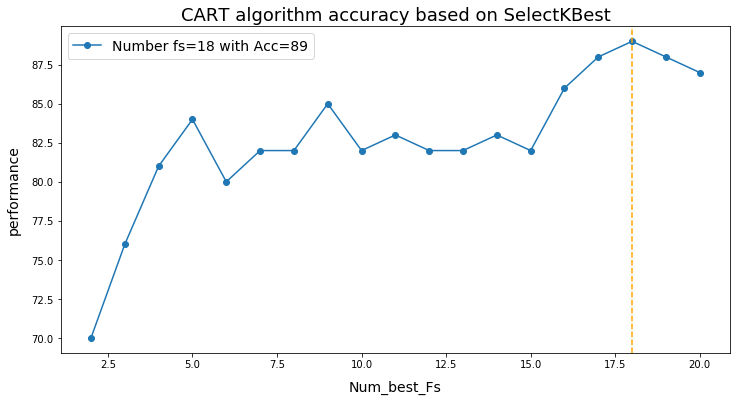

In [119]:
plt.figure(figsize=(12,6))
plt.plot(df['Num_best'],df['validation_accuracy'],label='Number fs=18 with Acc=89',marker='o')

plt.title("CART algorithm accuracy based on SelectKBest",fontsize=18)
plt.axvline(x=18, color='orange', linestyle='--')
plt.xlabel('Num_best_Fs',labelpad=10, fontsize=14)
plt.ylabel('performance',labelpad=10, fontsize=14)
plt.legend(loc='bst',fontsize=14)

print("the best fretures number by SelectKBest K=18 :")
print("Age, Adress, FBS, Urea, ALB, GPT, GOT, ALP, CA15, CEA, WBC, RBC, HGB, PLT, ESR, LDH, Creatinine")
plt.show()